<a href="https://colab.research.google.com/github/Gulwalishah/Euclidean-distance-function/blob/main/Euclidean_distance_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IndexError: ignored

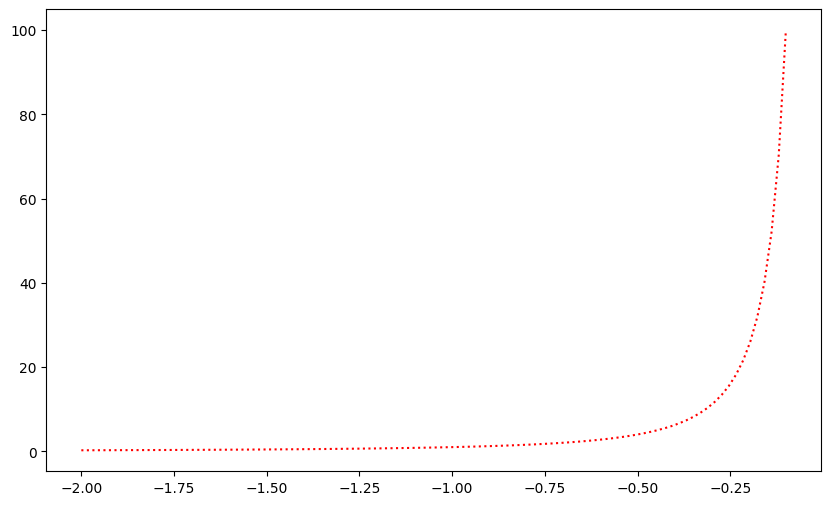

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

def cubic_spline(S, M, x, h, i, t):
    q = (M[i-1] * (x[i] - t)**3) / (6 * h[i-1]) + (M[i] * (t - x[i-1])**3) / (6 * h[i-1]) + (S[i-1] - M[i-1] * h[i-1]**2 / 6) * (x[i] - t) / h[i-1]
    return q

def plot_histogram_nihut(x, z):
    xx = [x[0]] * 2
    zz = [0, 0]

    for i in range(1, len(x)):
        xx.extend([x[i]] * 3)
        zz.extend([0, z[i], z[i]])

    zz.extend([0, 0])
    plt.plot(xx, zz, 'r')

def plot2(fun, a, b, nr, str):
    x = np.linspace(a, b, nr)
    y = [fun(xi) for xi in x]
    plt.plot(x, y, str)

def q(x):
    return 1 / x**2

def intf(x):
    return -1 / x

def df(x):
    return -2 / x**3

def ddf(x):
    return 6 / x**4

def cubic_histopolation():
    n = 32
    rajat = 2

    k = [0.5] * (n-2)
    x = np.linspace(-2, -0.1, n+1)

    a = x[0]
    b = x[-1]
    hh = (b - a) / n

    z = [1 / (x[i] * x[i+1]) for i in range(n)]

    D = np.zeros(n)
    D[0] = ddf(a)
    D[-1] = ddf(b)

    for i in range(1, n-1):
        D[i] = 12 * hh**3 / (x[i-1] * x[i] * x[i+1] * x[i+2])

    xi = [x[0]] + [k[i] * x[i] + (1 - k[i]) * x[i+1] for i in range(n-2)] + [x[-1]]

    eps = [x[i+1] - xi[i] for i in range(n-1)]
    nu = [xi[i+1] - x[i+1] for i in range(n-1)]
    delta = [eps[i] + nu[i] for i in range(n-1)]
    h = [x[i+1] - x[i] for i in range(n-1)] + [x[-1] - x[-2]]

    nr = 100
    plt.figure(figsize=(10, 6))
    plot2(q, a, b, nr, 'r:')
    plot_histogram_nihut(x, z)

    A5 = np.zeros((n-4, n))

    for i in range(2, n-2):
        A5[i-2, i-2:i+3] = [hh**3/192, hh**3*76/192, hh**3*230/192, hh**3*76/192, hh**3/192]

    A5[0, 0:5] = [hh**3*2/576, hh**3*229/576, hh**3*690/576, hh**3*228/576, hh**3*3/576]
    A5[-1, -5:] = [hh**3*2/576, hh**3*229/576, hh**3*690/576, hh**3*228/576, hh**3*3/576]
    A5[1, 0:4] = [hh**3*52/192, hh**3*255/192, hh**3*76/192, hh**3/192]
    A5[-2, -4:] = [hh**3*52/192, hh**3*255/192, hh**3*76/192, hh**3/192]

    if rajat == 1:
        A5[0, 0] = 1
        A5[-1, -1] = 1
    elif rajat == 2:
        A5[0, 0] = hh**2/1152 * 5
        A5[0, 1] = hh**2/1152 * 8
        A5[0, 2] = hh**2/1152 * -1
        A5[0, 3] = hh**2/1152 * 10
        A5[0, 4] = hh**2/1152 * -2

        A5[-1, -1] = hh**2/1152 * 5
        A5[-1, -2] = hh**2/1152 * 8
        A5[-1, -3] = hh**2/1152 * -1
        A5[-1, -4] = hh**2/1152 * 10
        A5[-1, -5] = hh**2/1152 * -2

    A = np.linalg.pinv(A5 @ np.diag(delta))

    # Solve for M
    M = A @ D[1:-1]
    M = np.concatenate(([D[0]], M, [D[-1]]))

    xx = []
    yy = []

    for i in range(1, n):
        t = np.linspace(x[i-1], x[i], 10)
        for tt in t:
            xx.append(tt)
            yy.append(cubic_spline(z, M, x, h, i, tt))

    plt.plot(xx, yy, 'b')
    plt.title("Cubic Hermite Interpolation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(['$1/x^2$', 'Interpolation'])
    plt.grid(True)
    plt.show()

cubic_histopolation()


# Euclidean distance function

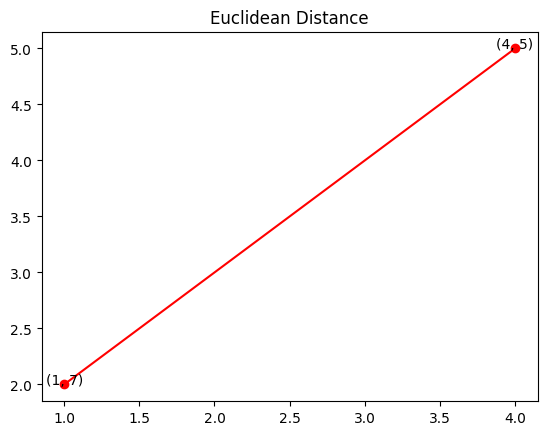

In [6]:
import matplotlib.pyplot as plt

def euclidean_distance(x1, y1, x2, y2):
  """
  Calculates the Euclidean distance between two points.

  Args:
    x1: The x-coordinate of the first point.
    y1: The y-coordinate of the first point.
    x2: The x-coordinate of the second point.
    y2: The y-coordinate of the second point.

  Returns:
    The Euclidean distance between the two points.
  """

  return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

# Define the two points
x1, y1 = 1, 2
x2, y2 = 4, 5

# Calculate the Euclidean distance
distance = euclidean_distance(x1, y1, x2, y2)

# Plot the two points
plt.plot([x1, x2], [y1, y2], 'ro-')

# Label the points
plt.text(x1, y1, '(1, 7)', ha='center')
plt.text(x2, y2, '(4, 5)', ha='center')

# Add a title and show the plot
plt.title('Euclidean Distance')
plt.show()

# **When n=4**

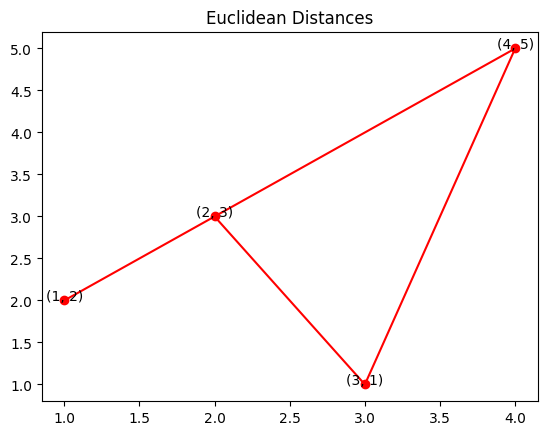

In [7]:
import matplotlib.pyplot as plt

def euclidean_distance(x1, y1, x2, y2):
  """
  Calculates the Euclidean distance between two points.

  Args:
    x1: The x-coordinate of the first point.
    y1: The y-coordinate of the first point.
    x2: The x-coordinate of the second point.
    y2: The y-coordinate of the second point.

  Returns:
    The Euclidean distance between the two points.
  """

  return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

# Define the four points
x1, y1 = 1, 2
x2, y2 = 4, 5
x3, y3 = 3, 1
x4, y4 = 2, 3

# Calculate the Euclidean distances
distance_12 = euclidean_distance(x1, y1, x2, y2)
distance_13 = euclidean_distance(x1, y1, x3, y3)
distance_14 = euclidean_distance(x1, y1, x4, y4)
distance_23 = euclidean_distance(x2, y2, x3, y3)
distance_24 = euclidean_distance(x2, y2, x4, y4)
distance_34 = euclidean_distance(x3, y3, x4, y4)

# Plot the four points
plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], 'ro-')

# Label the points
plt.text(x1, y1, '(1, 2)', ha='center')
plt.text(x2, y2, '(4, 5)', ha='center')
plt.text(x3, y3, '(3, 1)', ha='center')
plt.text(x4, y4, '(2, 3)', ha='center')

# Add a title and show the plot
plt.title('Euclidean Distances')
plt.show()